In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

2024-02-06 00:07:11.821345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#adopted from:
#https://github.com/csbanon/mnist-classifiers/blob/main/mnist-digits/mnist-digit-classification-with-a-convolutional-neural-network.ipynb

In [3]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [11]:
#train_data[0][0]
#train_data[1][0]

In [4]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [5]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [6]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [7]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


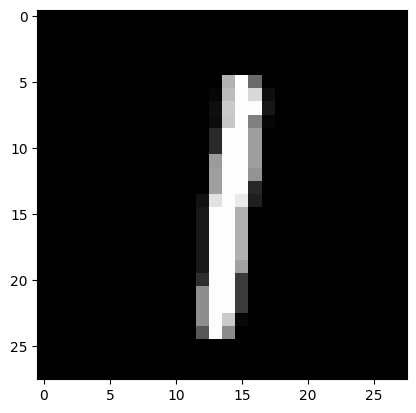

In [8]:
# Show a sample MNIST digit.
plt.imshow(train_images[40], cmap=plt.get_cmap('gray'))
plt.show()

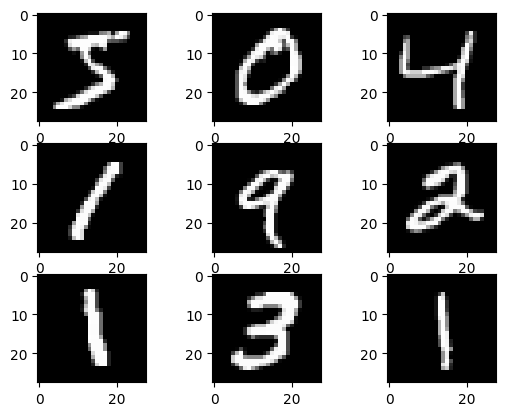

In [9]:
#we can do it better;)
for i in range(9): 
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [11]:
# Define the convolutional neural network.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Define the parameters.
num_epochs = 10
batch_size = 128

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2318 - accuracy: 0.9304 - val_loss: 0.0683 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0483 - val_accuracy: 0.9841
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0393 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy:

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9877
Test Accuracy: 0.9876999855041504
Test Loss: 0.0432402603328228


In [16]:
# Save the metrics.
metrics = history.history

In [17]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

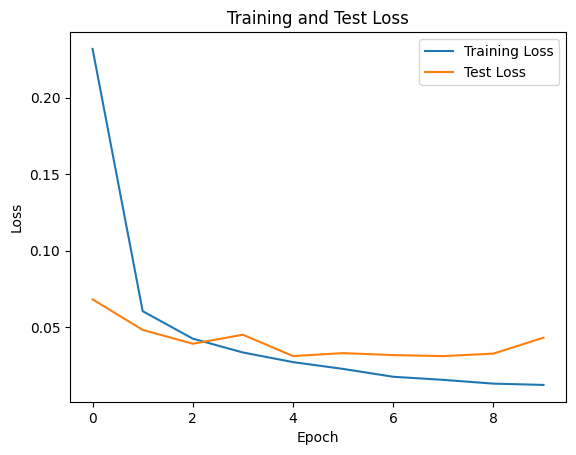

In [18]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [19]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

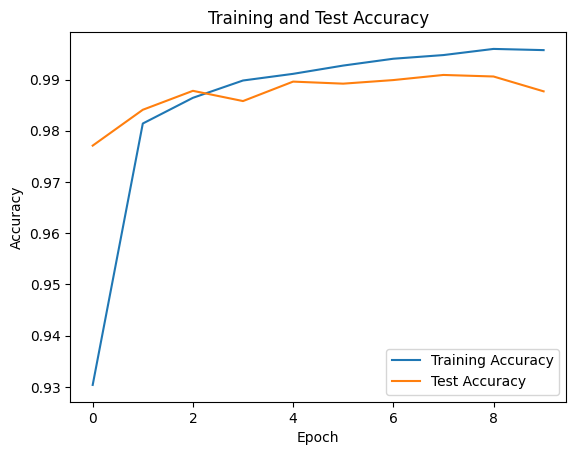

In [20]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

In [21]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


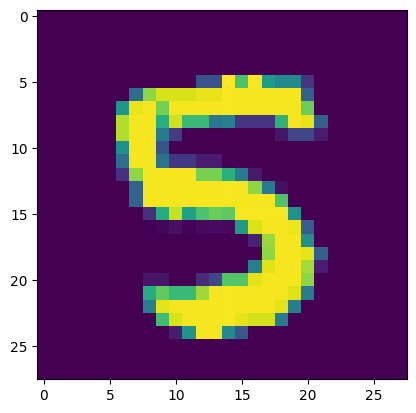

In [22]:
# Choose an index.
index = 120

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [23]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5
